# Importing important Libraries

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from google.colab import drive


In [111]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
df = pd.read_csv('/content/drive/MyDrive/prosperLoanData.csv')

# Data Preparation

In [113]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [114]:
df.shape


(113937, 81)

In [115]:
df.drop(columns=["ListingKey","ListingNumber","GroupKey","LoanKey","LoanNumber","MemberKey","DateCreditPulled"],inplace= True )

In [116]:
df.duplicated().sum()

0

# Data Cleaning

In [117]:
#missing values
lst = df.isnull().sum()
for i in range(len(lst)) :
    if lst[i] != 0 :
        x= lst[i]
        col = df.columns[i]
        y= (x/df.shape[0])*100
        print("col num : " +str(i) + " /  " + col + " / " + str(x) + " nulls /"+ str(round(y,2)) +" %")

col num : 1 /  CreditGrade / 84984 nulls /74.59 %
col num : 4 /  ClosedDate / 58848 nulls /51.65 %
col num : 5 /  BorrowerAPR / 25 nulls /0.02 %
col num : 8 /  EstimatedEffectiveYield / 29084 nulls /25.53 %
col num : 9 /  EstimatedLoss / 29084 nulls /25.53 %
col num : 10 /  EstimatedReturn / 29084 nulls /25.53 %
col num : 11 /  ProsperRating (numeric) / 29084 nulls /25.53 %
col num : 12 /  ProsperRating (Alpha) / 29084 nulls /25.53 %
col num : 13 /  ProsperScore / 29084 nulls /25.53 %
col num : 15 /  BorrowerState / 5515 nulls /4.84 %
col num : 16 /  Occupation / 3588 nulls /3.15 %
col num : 17 /  EmploymentStatus / 2255 nulls /1.98 %
col num : 18 /  EmploymentStatusDuration / 7625 nulls /6.69 %
col num : 21 /  CreditScoreRangeLower / 591 nulls /0.52 %
col num : 22 /  CreditScoreRangeUpper / 591 nulls /0.52 %
col num : 23 /  FirstRecordedCreditLine / 697 nulls /0.61 %
col num : 24 /  CurrentCreditLines / 7604 nulls /6.67 %
col num : 25 /  OpenCreditLines / 7604 nulls /6.67 %
col num : 

In [118]:
df.drop(columns=["CreditGrade","TotalProsperLoans","TotalProsperPaymentsBilled",
                 "ProsperPaymentsLessThanOneMonthLate","ProsperPaymentsOneMonthPlusLate","ProsperPrincipalBorrowed",
                "ProsperPrincipalOutstanding","ScorexChangeAtTimeOfListing","LoanFirstDefaultedCycleNumber","OnTimeProsperPayments",
                ],inplace= True )

In [119]:
df.dropna(subset=["EstimatedEffectiveYield","EstimatedLoss","EstimatedReturn","ProsperRating (numeric)",
"ProsperRating (Alpha)","ProsperScore"],inplace = True)

In [120]:
lst = df.isnull().sum()
for i in range(len(lst)) :
    if lst[i] != 0 :
        x= lst[i]
        col = df.columns[i]
        y= (x/df.shape[0])*100
        print("col num : " +str(i) + " /  " + col + " / " + str(x) + " nulls /"+ str(round(y,2)) +" %")

col num : 3 /  ClosedDate / 58848 nulls /69.35 %
col num : 15 /  Occupation / 1333 nulls /1.57 %
col num : 17 /  EmploymentStatusDuration / 19 nulls /0.02 %
col num : 41 /  DebtToIncomeRatio / 7296 nulls /8.6 %


In [121]:
df["DebtToIncomeRatio"].fillna(df["DebtToIncomeRatio"].mean,inplace = True)


In [122]:
df.dropna(inplace = True)


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25983 entries, 15 to 113935
Data columns (total 64 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingCreationDate                 25983 non-null  object 
 1   Term                                25983 non-null  int64  
 2   LoanStatus                          25983 non-null  object 
 3   ClosedDate                          25983 non-null  object 
 4   BorrowerAPR                         25983 non-null  float64
 5   BorrowerRate                        25983 non-null  float64
 6   LenderYield                         25983 non-null  float64
 7   EstimatedEffectiveYield             25983 non-null  float64
 8   EstimatedLoss                       25983 non-null  float64
 9   EstimatedReturn                     25983 non-null  float64
 10  ProsperRating (numeric)             25983 non-null  float64
 11  ProsperRating (Alpha)               259

In [124]:
df["ListingCreationDate"] = df["ListingCreationDate"].str.extract(r"^(\w+)")
df["FirstRecordedCreditLine"] = df["FirstRecordedCreditLine"].str.extract(r"^(\w+)")
df["LoanOriginationDate"] = df["LoanOriginationDate"].str.extract(r"^(\w+)")

In [125]:
df.reset_index(inplace =True)

In [126]:
df.drop(columns="index",inplace = True)


In [127]:
#adjusting the datetime columns.
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25983 entries, 0 to 25982
Data columns (total 64 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ListingCreationDate                 25983 non-null  datetime64[ns]
 1   Term                                25983 non-null  int64         
 2   LoanStatus                          25983 non-null  object        
 3   ClosedDate                          25983 non-null  datetime64[ns]
 4   BorrowerAPR                         25983 non-null  float64       
 5   BorrowerRate                        25983 non-null  float64       
 6   LenderYield                         25983 non-null  float64       
 7   EstimatedEffectiveYield             25983 non-null  float64       
 8   EstimatedLoss                       25983 non-null  float64       
 9   EstimatedReturn                     25983 non-null  float64       
 10  ProsperRating (numeric

In [128]:
#outliers

def handling_outliers(orignal_df,lst_of_columns) :
    for i in lst_of_columns:
        q1 = orignal_df[i].quantile(0.25)
        q3 = orignal_df[i].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)
        for col in range(20,orignal_df.shape[0]):
            if orignal_df[i][col] < lower_bound :
                orignal_df[i][col]  = lower_bound
            elif orignal_df[i][col] > upper_bound :
                orignal_df[i][col]  = upper_bound
            else:
                continue 
    print("handling is done")
    

def get_continus_list(df_):
    obj = df_.select_dtypes('object')
    lst = list(df_.columns)
    obj_lst = list(obj.columns)
    for i in obj_lst :
        lst.remove(i)
    return lst           




There are some important features including:

BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.

ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or * lowest risk score. Applicable for loans originated after July 2009.

LoanOriginationDate: The date the loan was originated.

LenderYield: The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.

What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think that Loan Status and Employment Status will have a strong impact on loan and the features we are trying to explor. Also the Monthly Income will play a role here and the Term (lenght of the loan) may have an effect. SO I will try to invistigate these more.

# EDA: Exploratory Data Analysis

**Univariate Analysis** on the most important features: Borrower APR , Prosper Score and Loan Original Amount

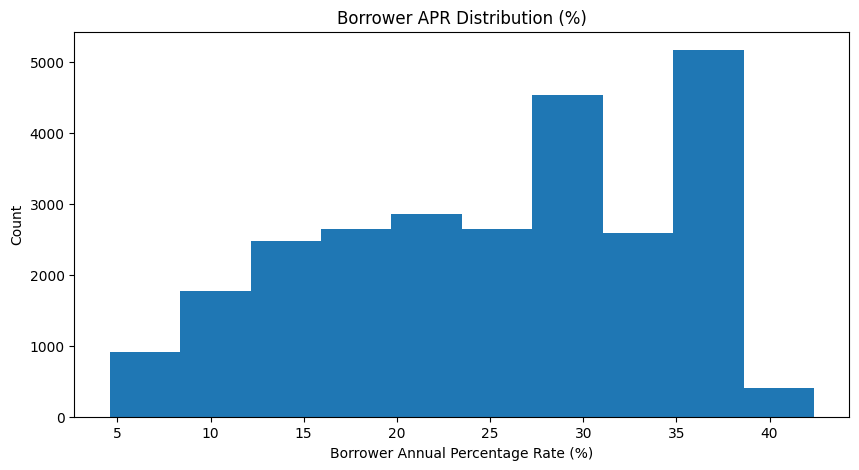

In [129]:
borrowe_APR_percentage = df['BorrowerAPR']*100

plt.figure(figsize=[10, 5])
plt.hist(x = borrowe_APR_percentage, bins = 10)
plt.title('Borrower APR Distribution (%)')
plt.xlabel('Borrower Annual Percentage Rate (%)')
plt.ylabel('Count')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40], ['5','10', '15', '20', '25', '30', '35', '40'])
plt.show()


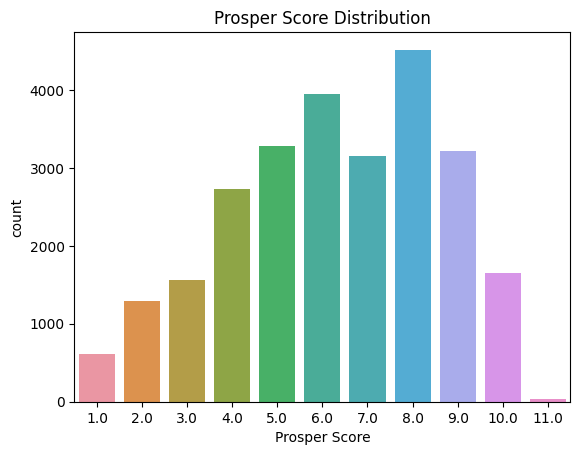

In [130]:
import seaborn as sns
sns.countplot(data=df, x= 'ProsperScore', color= None)
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score');

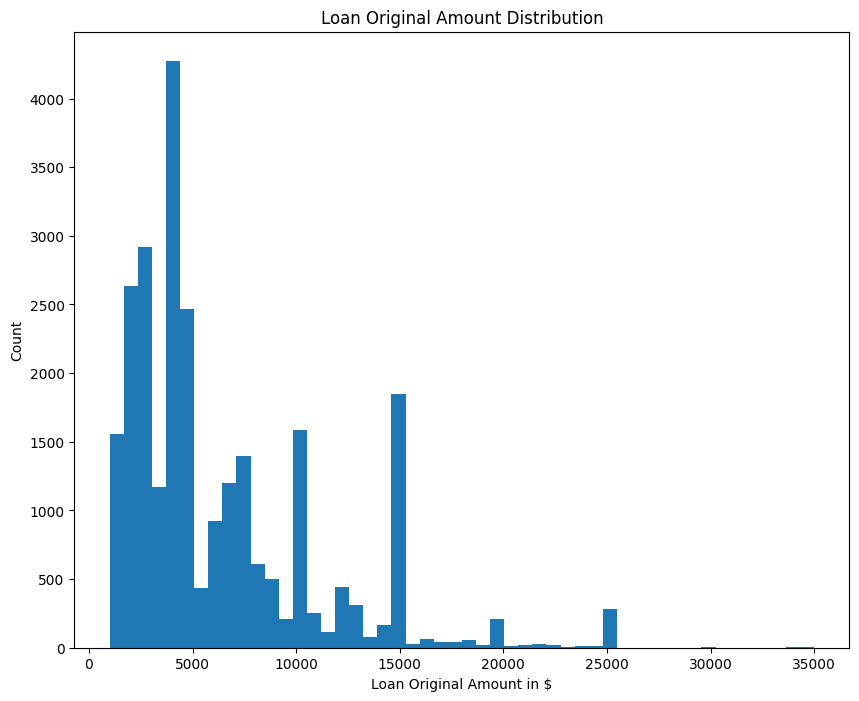

In [131]:
plt.figure(figsize=[10, 8])
plt.hist(data = df, x = 'LoanOriginalAmount', bins = 50)
plt.title('Loan Original Amount Distribution')
plt.xlabel('Loan Original Amount in $')
plt.ylabel('Count')
plt.show()


**What I understood from this Univariate Analysis:** 



*   Borrower APR Distribution: The data is normally distributed and the peak values are from 15 to 20% with a spike at 35%

*   Prosper Scores : The prosper scores are normally distributed and the values at 4 , 6 and 8 are the most common.

* Loan Original Amount: The data is skewed with a tail.



In [132]:
df['Term'].value_counts()

36    20756
60     3696
12     1531
Name: Term, dtype: int64

Text(0.5, 0, 'Term (Months)')

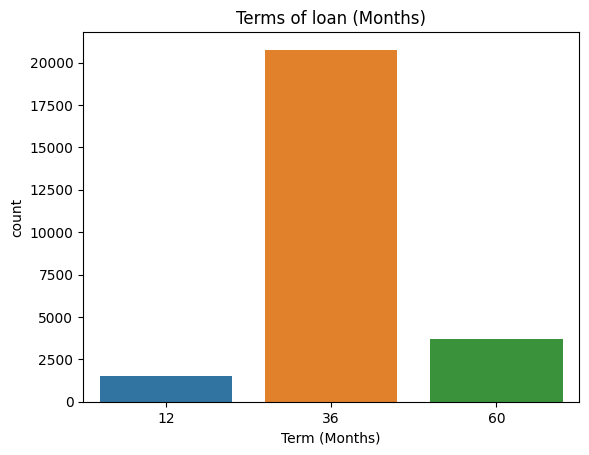

In [133]:
sns.countplot(data=df,x= 'Term',color=None);
plt.title('Terms of loan (Months)')
plt.xlabel('Term (Months)')

Inference: We see that the most values are in 36 months

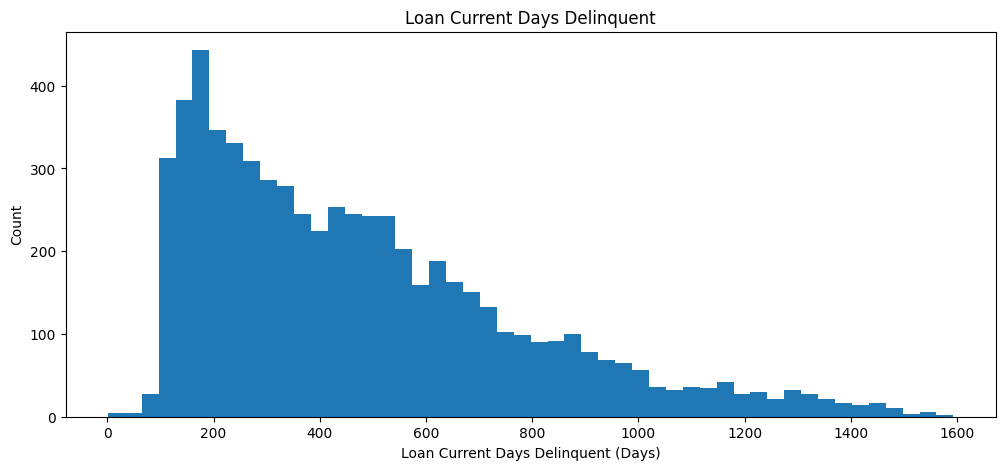

In [134]:
plt.figure(figsize=[12, 5])
plt.hist(data = df[df['LoanCurrentDaysDelinquent']>0], x = 'LoanCurrentDaysDelinquent', bins = 50)
plt.title('Loan Current Days Delinquent')
plt.xlabel('Loan Current Days Delinquent (Days)')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Prosper Rating Distribution')

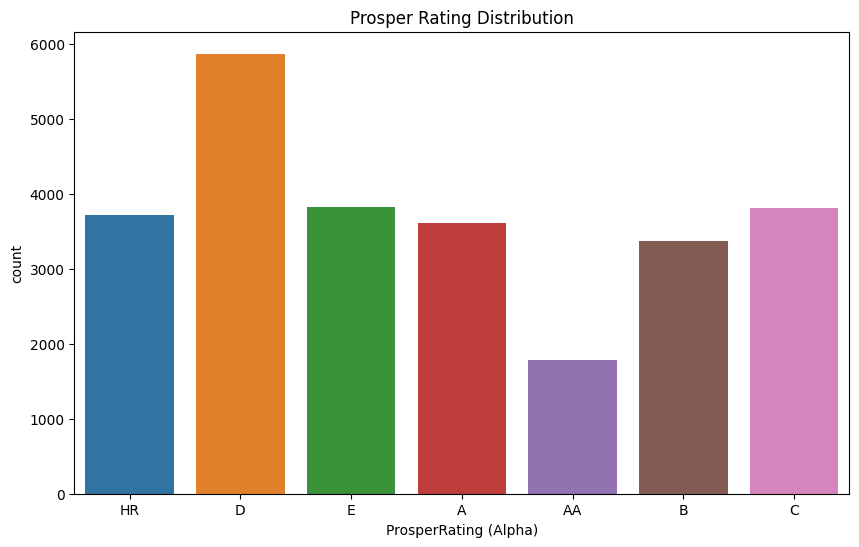

In [135]:
plt.figure(figsize=[10, 6]);
sns.countplot(data=df,x='ProsperRating (Alpha)',color=None)
plt.title('Prosper Rating Distribution')

**Inference:** Most borrowers get a Prosper Rating of 'C'

Text(0.5, 0, 'Status')

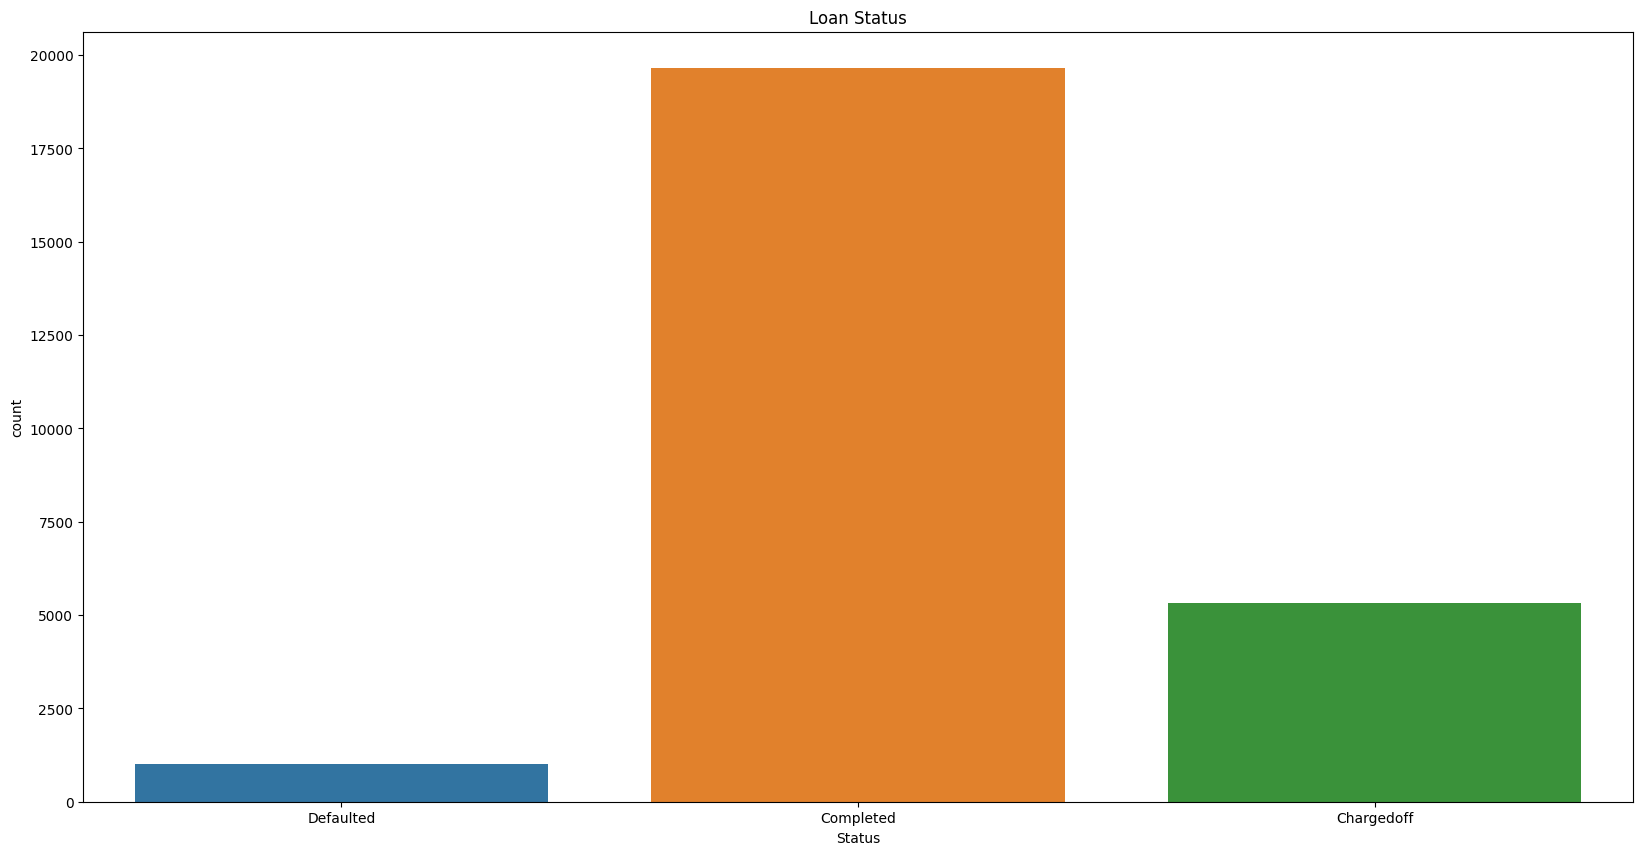

In [136]:
plt.figure(figsize=(20,10))

sns.countplot(data=df,x= 'LoanStatus',color=None)
plt.title('Loan Status')
plt.xlabel('Status')

Text(0.5, 0, 'Rating')

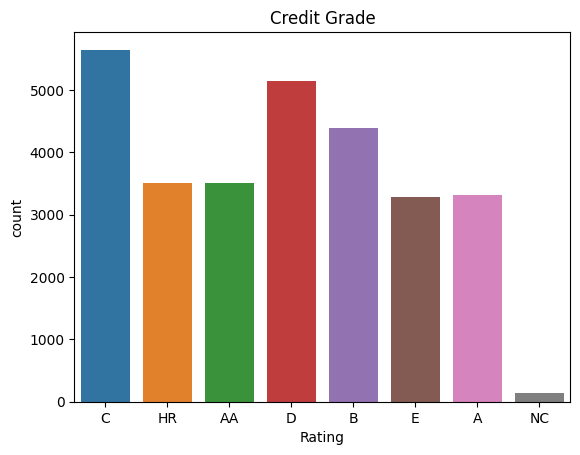

In [137]:
sns.countplot(data=data,x= 'CreditGrade',color=None);
plt.title('Credit Grade')
plt.xlabel('Rating')

Inference: The most number of Borrowers Credit Grade is C , followed by D and B.

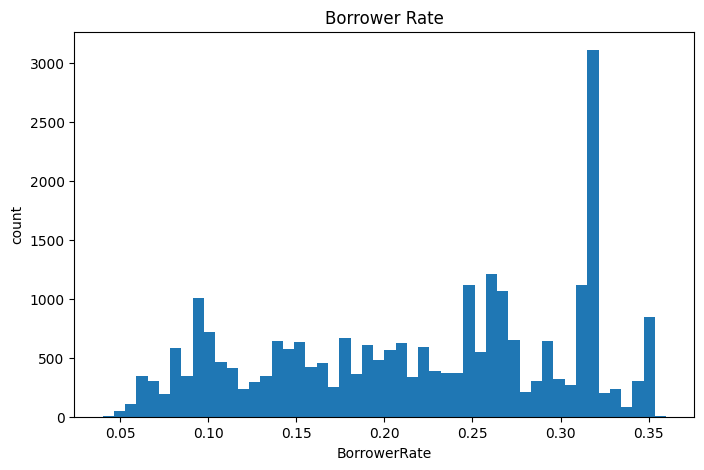

In [138]:
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerRate', bins = 50)
plt.xlabel('BorrowerRate')
plt.ylabel('count')
plt.title('Borrower Rate')
plt.show()

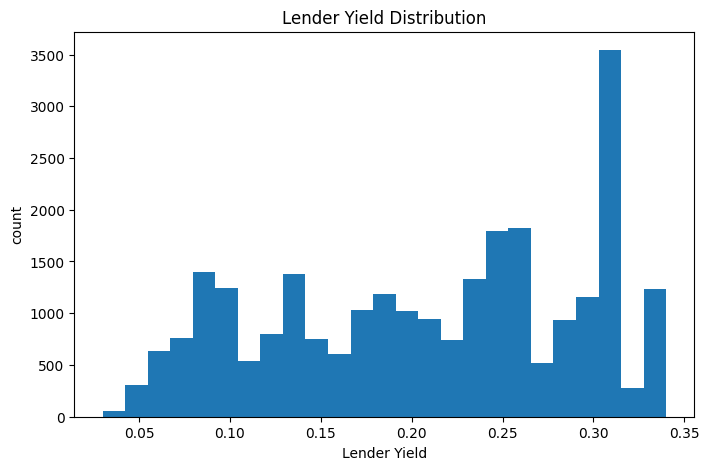

In [139]:
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'LenderYield', bins = 25)
plt.xlabel('Lender Yield')
plt.title('Lender Yield Distribution')
plt.ylabel('count')
plt.show()


**Research Questions:**

1. Most number of borrowers of Credit Grade : C , D followed by A

2. 

3. Highest number of Borrower Rate: Between 0.1 and 0.2

4. Does the highest number of LenderYeild is between 0.1 and 0.2? YES

5. Is the Credit Grade really accurate? YES. The higher credit grade leads to higher Monthly Loan Payment.

6. Accuarcy of Credit Grade as of Loan Status : It can be seen in the graph that it is highly accurate.



# Feature Engineering

In [140]:
#feature selection
def target_handling(row): 
    if row == 'Completed':
        return 1
    else:
        return 0

df['Status'] = df['LoanStatus'].apply(target_handling)
df.drop('LoanStatus',axis=1,inplace=True)

In [141]:
df['Status'].value_counts()

1    19644
0     6339
Name: Status, dtype: int64

In [142]:
obj = df.select_dtypes('object')
obj.columns

Index(['ProsperRating (Alpha)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'FirstRecordedCreditLine', 'DebtToIncomeRatio',
       'IncomeRange', 'LoanOriginationQuarter'],
      dtype='object')